<a href="https://colab.research.google.com/github/mohithaareti/task-7/blob/main/task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("breast-cancer.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
X = df.drop(columns=["id", "diagnosis"])
y = LabelEncoder().fit_transform(df["diagnosis"])


In [ ]:
X_vis = df[["radius_mean", "texture_mean"]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_vis_train_scaled = scaler.fit_transform(X_vis_train)
X_vis_test_scaled = scaler.transform(X_vis_test)

In [ ]:
svm_linear = SVC(kernel="linear", C=1).fit(X_vis_train_scaled, y_vis_train)
svm_rbf = SVC(kernel="rbf", C=1, gamma=0.5).fit(X_vis_train_scaled, y_vis_train)


In [ ]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("radius_mean")
    plt.ylabel("texture_mean")
    plt.show()

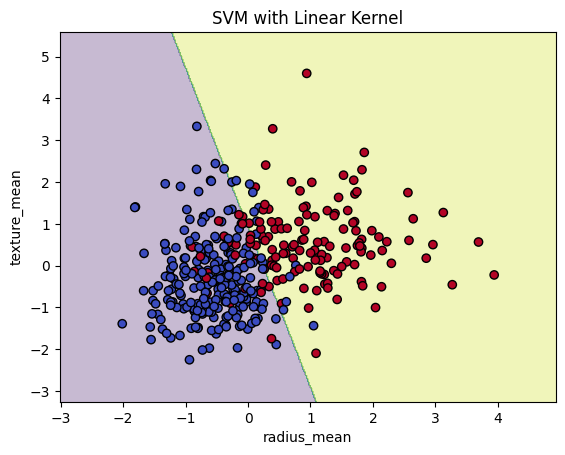

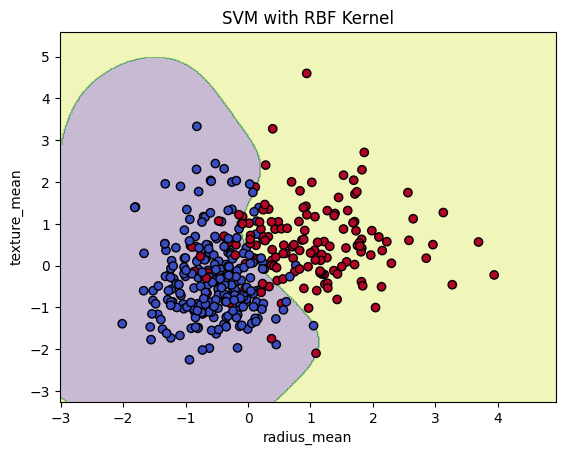

In [ ]:
plot_decision_boundary(svm_linear, X_vis_train_scaled, y_vis_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_vis_train_scaled, y_vis_train, "SVM with RBF Kernel")


In [ ]:
param_grid = {"C": [0.1, 1, 10], "gamma": [0.01, 0.1, 1]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]})

In [ ]:
best_params = grid.best_params_
best_score = grid.best_score_


In [ ]:
cv_linear = cross_val_score(SVC(kernel="linear", C=1), X_train_scaled, y_train, cv=5).mean()
cv_rbf = cross_val_score(SVC(kernel="rbf", C=best_params["C"], gamma=best_params["gamma"]), X_train_scaled, y_train, cv=5).mean()

best_params, best_score, cv_linear, cv_rbf

({'C': 1, 'gamma': 0.01},
 np.float64(0.9697784810126582),
 np.float64(0.9647151898734176),
 np.float64(0.9697784810126582))